#Water Quality 
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
The file include:
1. pH value:PH is an important parameter in evaluating the acid–base balance of water. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5
2. Hardness:Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. Solids (Total dissolved solids - TDS): The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l.
4. Chloramines: Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter is safe.
5. Sulfate:Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. It ranges from 3 to 30 mg/L in most freshwater supplies
6. Conductivity:the amount of dissolved solids in water determines the electrical conductivity.EC value should not exceeded 400 μS/cm.
7. Organic_carbon:Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8. Trihalomethanes:THMs are chemicals which may be found in water treated with chlorine.THM levels up to 80 ppm is considered safe .
9. Turbidity:The turbidity of water depends on the quantity of solid matter present in the suspended state. WHO recommended value of 5.00 NTU.
10. Potability:Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

The dataset is from [Kaggle](https://www.kaggle.com/adityakadiwal/water-potability) which has the information regarding different water samples.




In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,plot_roc_curve

In [2]:
#importing dataset
df = pd.read_csv('water_potability.csv')
df.shape

(3276, 11)

In [3]:
df.head()

Sample_No.        ph    Hardness  ...  Trihalomethanes  Turbidity  Potability
0           1  3.454450  205.345000  ...        34.567000   4.567765           0
1           2  3.716080  129.422921  ...        56.329076   4.500656           0
2           3  8.099124  224.236259  ...        66.420093   3.055934           0
3           4  8.316766  214.373394  ...       100.341674   4.628771           0
4           5  9.092223  181.101509  ...        31.997993   4.075075           0

[5 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_No.       3276 non-null   int64  
 1   ph               2786 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


In [4]:
df.describe()

Sample_No.           ph  ...    Turbidity   Potability
count  3276.000000  2786.000000  ...  3276.000000  3276.000000
mean   1638.500000     7.079493  ...     3.967276     0.390110
std     945.844067     1.595513  ...     0.780256     0.487849
min       1.000000     0.000000  ...     1.450000     0.000000
25%     819.750000     6.091810  ...     3.440160     0.000000
50%    1638.500000     7.035894  ...     3.955122     0.000000
75%    2457.250000     8.061702  ...     4.500748     1.000000
max    3276.000000    14.000000  ...     6.739000     1.000000

[8 rows x 11 columns]

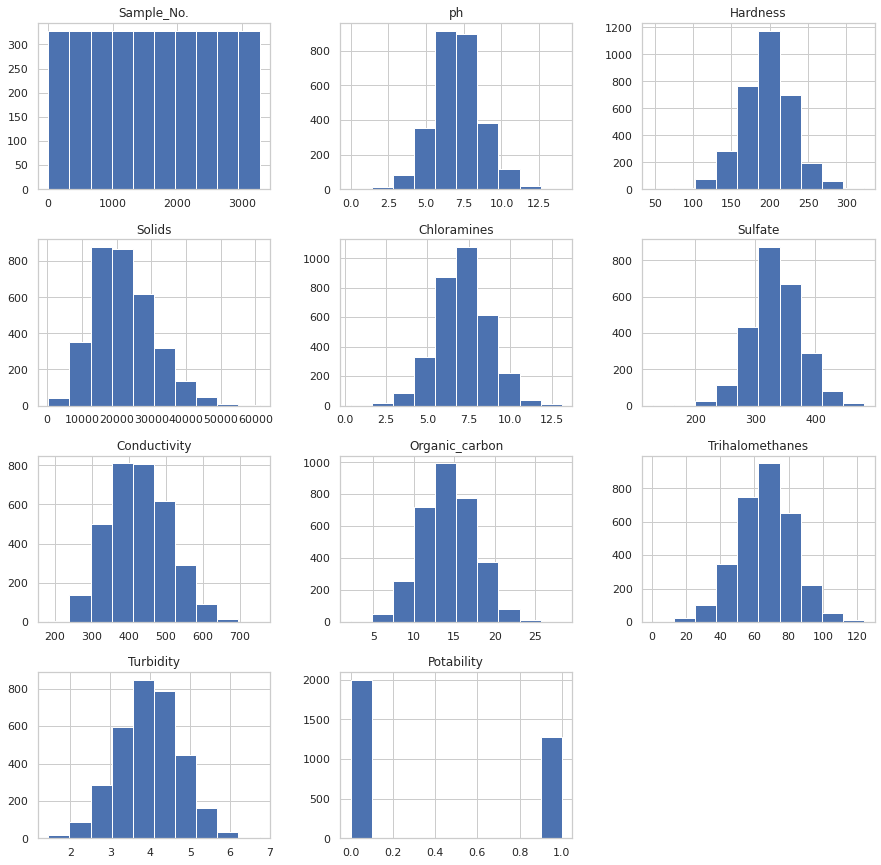

In [6]:
df.hist(figsize=(15,15))
plt.show()

##Data Cleaning


In [7]:
df.isnull().sum()

Sample_No.           0
ph                 490
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

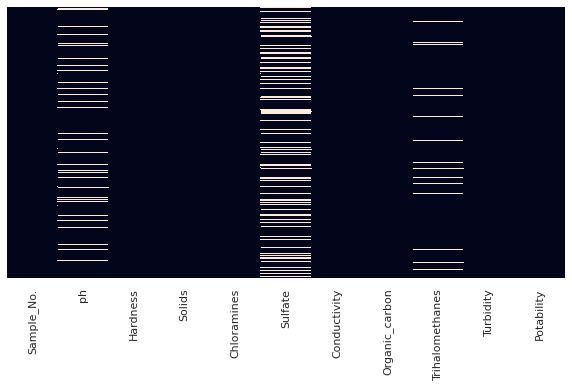

In [8]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

There are many ways to fill the missing values,like filling it with zero,filling with mean,median or interpolated value. 

In [10]:
#Filling missing value with mean
ndf = df
ndf['ph']=df['ph'].fillna(df['ph'].mean())
ndf['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
ndf['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [11]:
ndf.isnull().sum()

Sample_No.         0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

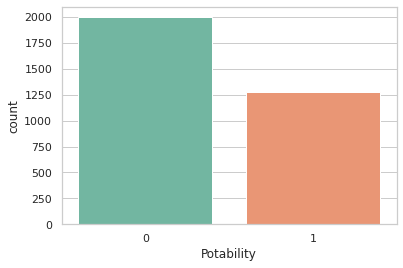

In [12]:
#Plotting the graph of potability
sns.countplot(x="Potability", data=ndf,palette="Set2")

ValueError: ignored

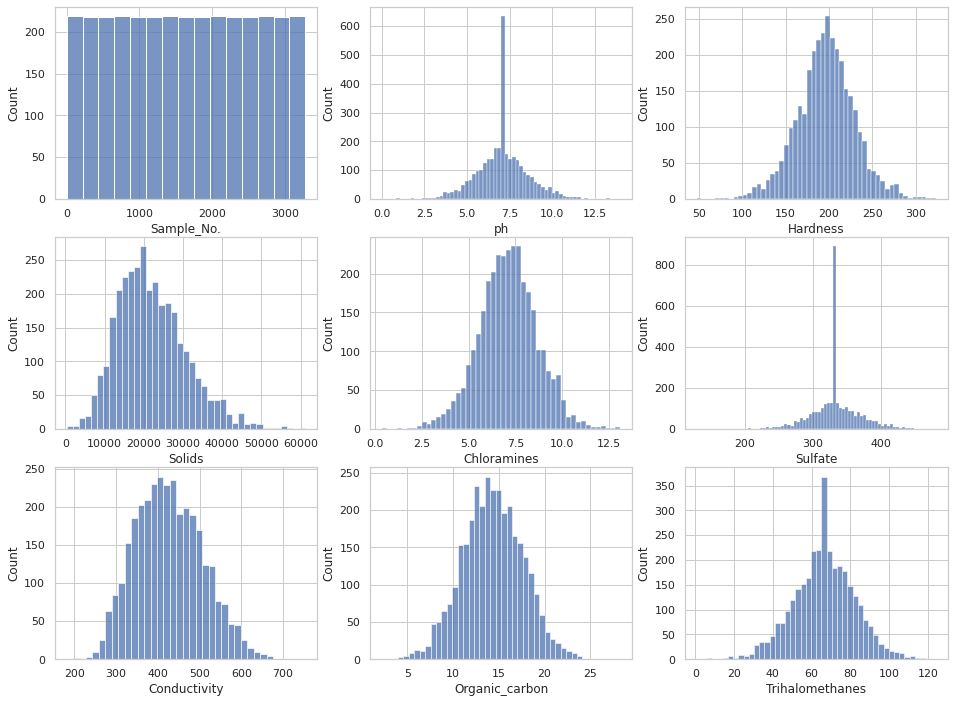

In [13]:
#Plotting graphs of different columns
plt.figure(figsize=(16,12))
cdf = ndf.drop('Potability',axis=1)
for i, column in enumerate(cdf.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column])

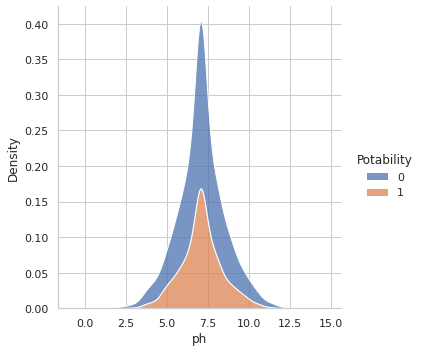

In [14]:
#3Graph of change in potability with ph
sns.displot(ndf, x="ph", hue="Potability", kind="kde", multiple="stack")

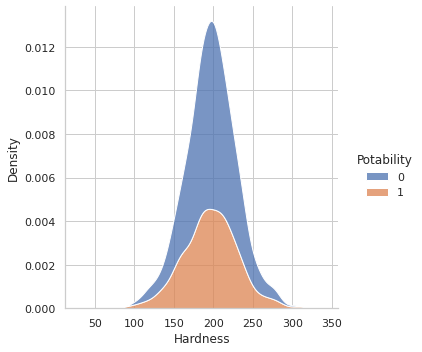

In [15]:
#Potability w.r.t. hardness
sns.displot(ndf, x="Hardness", hue="Potability", kind="kde", multiple="stack")

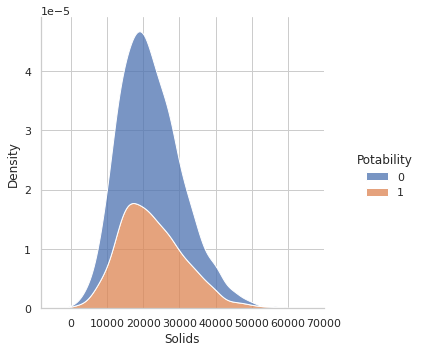

In [16]:
#potabilty w.r.t solids
sns.displot(ndf, x="Solids", hue="Potability", kind="kde", multiple="stack")

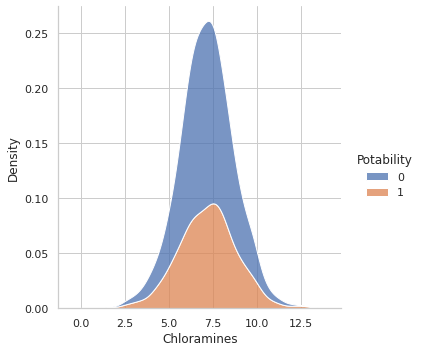

In [17]:
#potability w.r.t chloramines
sns.displot(ndf, x="Chloramines", hue="Potability", kind="kde", multiple="stack")

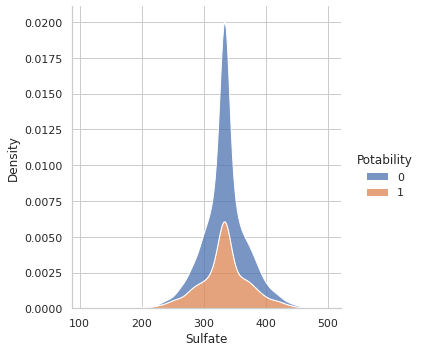

In [18]:
#potability w.r.t Sulphate
sns.displot(ndf, x="Sulfate", hue="Potability", kind="kde", multiple="stack")

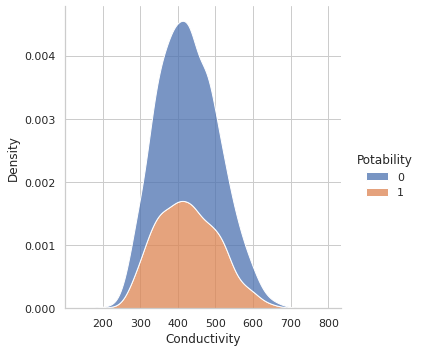

In [19]:
#potability w.r.t Conductivity
sns.displot(ndf, x="Conductivity", hue="Potability", kind="kde", multiple="stack")


<Figure size 800x640 with 0 Axes>

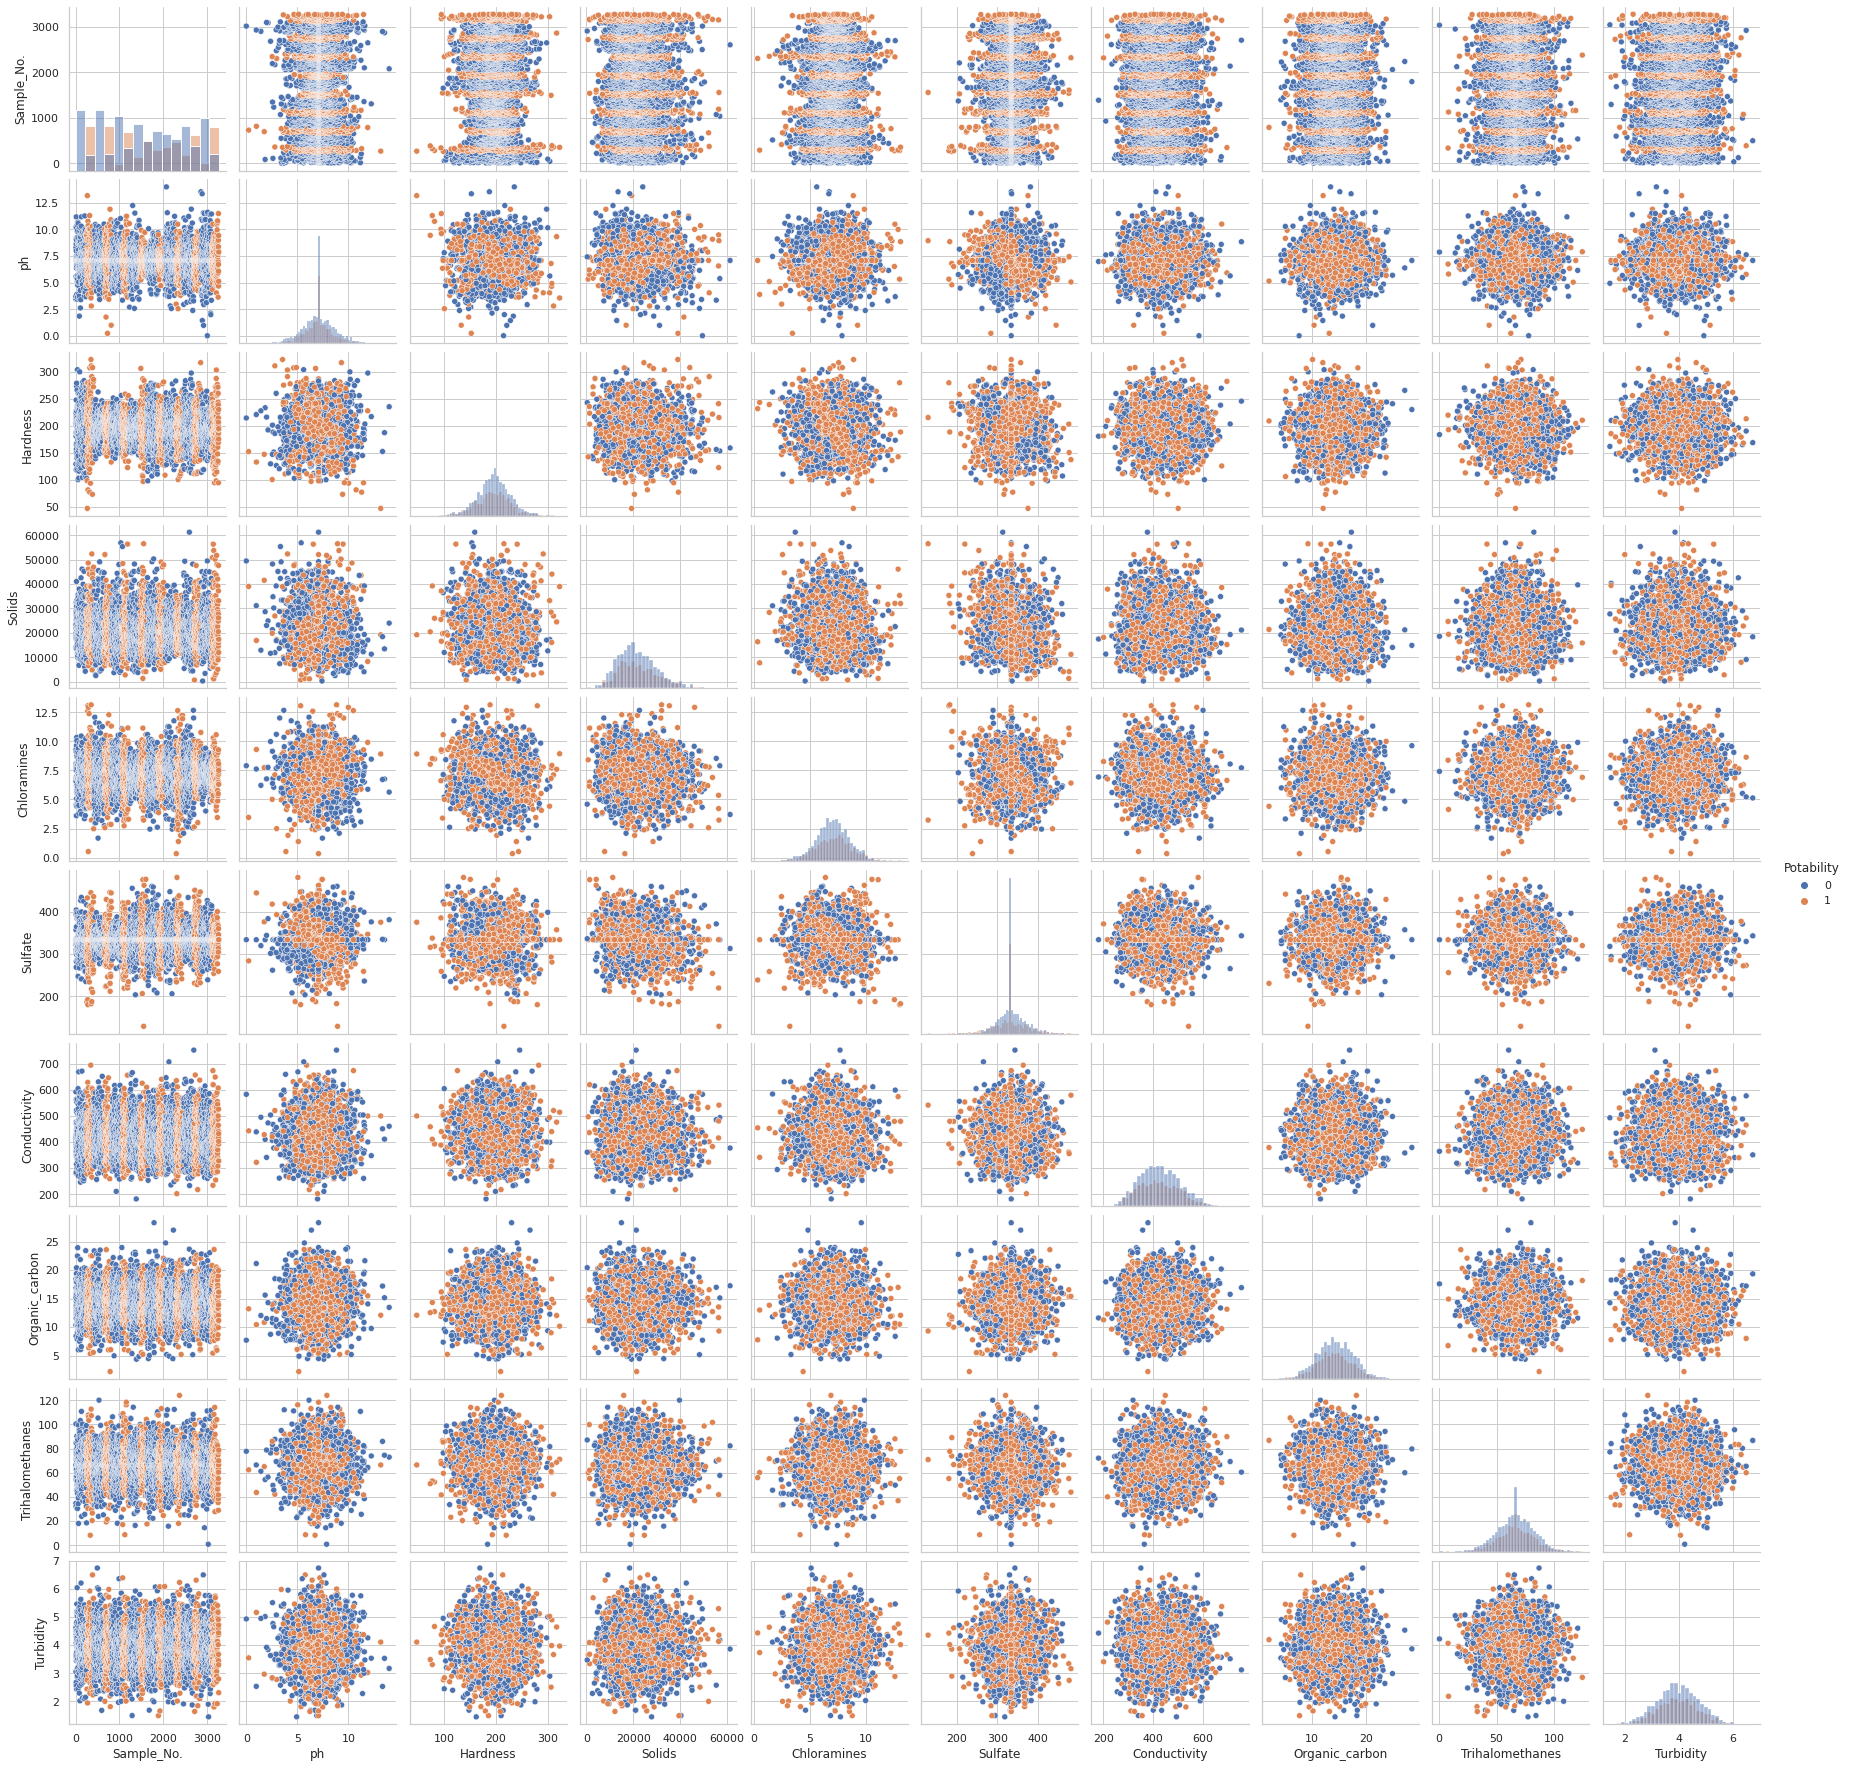

In [20]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(ndf, hue="Potability",diag_kind="hist")
plt.show()

Data look well distributed and Normalized.

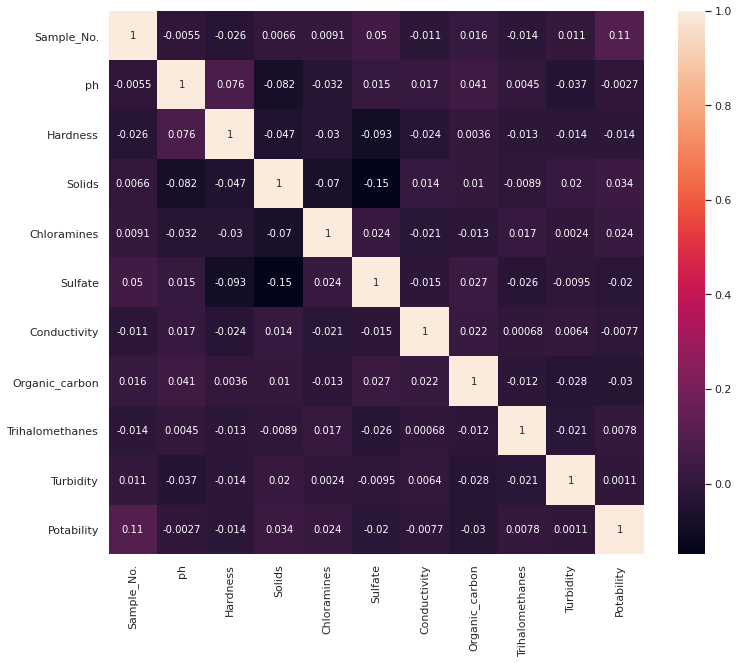

In [21]:
#plotting correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

There data is not much correlated.

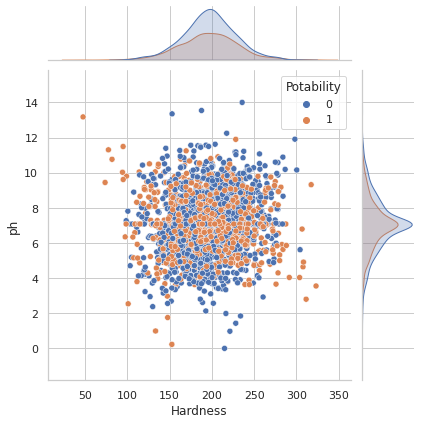

In [22]:
sns.jointplot(data=ndf, x="Hardness", y="ph",hue='Potability')

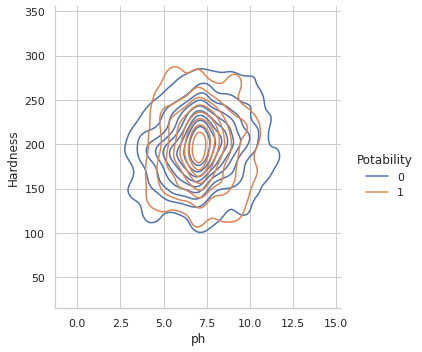

In [23]:
sns.displot(ndf, x="ph", y="Hardness", hue="Potability", kind="kde")

In [24]:
X = ndf.drop('Potability',axis=1)
y=ndf['Potability'].copy()

###Scaling the data for better results

In [25]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X= ss.fit_transform(X)
X= pd.DataFrame(X, columns= [col for col in df.columns if col!='Potability' ])


In [26]:
X.head()

Sample_No.        ph  Hardness  ...  Organic_carbon  Trihalomethanes  Turbidity
0   -1.731522 -2.464178  0.273017  ...       -1.191159        -2.016872   0.769723
1   -1.730465 -2.286331 -2.036416  ...        0.270599        -0.637182   0.683701
2   -1.729407  0.693110  0.847660  ...        0.781117         0.002576  -1.168183
3   -1.728350  0.841055  0.547647  ...        1.255133         2.153164   0.847921
4   -1.727293  1.368184 -0.464433  ...       -0.824351        -2.179744   0.138180

[5 rows x 10 columns]

###Training the data


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42,shuffle = True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models ={'RandomForestClassifier':RandomForestClassifier(),'GradientBoostingClassifier':GradientBoostingClassifier(),
        'AdaBoostClassifier':AdaBoostClassifier(),'LGBMClassifier':LGBMClassifier(),
         
        }

In [30]:
training_scores= []
testing_scores=[]

for key, value in models.items():
    value.fit(X_train_scaled, y_train)
    train_score= value.score(X_train_scaled,  y_train)
    test_score= value.score(X_test_scaled, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)
    
    print(f"{key}\n")
    print("Training Accuracy: {0:.3f}".format(train_score*100))
    print("Training Accuracy: {0:.3f} \n".format(test_score*100))

RandomForestClassifier

Training Accuracy: 100.000
Training Accuracy: 89.482 

GradientBoostingClassifier

Training Accuracy: 100.000
Training Accuracy: 99.695 

AdaBoostClassifier

Training Accuracy: 100.000
Training Accuracy: 99.695 

LGBMClassifier

Training Accuracy: 100.000
Training Accuracy: 97.409 



In [31]:
model = RandomForestClassifier()
n_estimators = [10, 100, 500]
max_features = ['sqrt', 'log2']

# Grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.871247 using {'max_features': 'sqrt', 'n_estimators': 500}
0.797328 (0.024327) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.861196 (0.028194) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.871247 (0.021902) with: {'max_features': 'sqrt', 'n_estimators': 500}
0.798728 (0.031504) with: {'max_features': 'log2', 'n_estimators': 10}
0.859415 (0.020814) with: {'max_features': 'log2', 'n_estimators': 100}
0.870611 (0.022285) with: {'max_features': 'log2', 'n_estimators': 500}


In [32]:
rclf = RandomForestClassifier(max_features='log2',n_estimators= 500)
rclf.fit(X_train_scaled,y_train)
y_pred = rclf.predict(X_test_scaled)
print("Training Accuracy: {0:.3f}".format(rclf.score(X_train_scaled, y_train)*100))
print("Testing Accuracy: {0:.3f}".format(accuracy_score(y_test,y_pred)*100))

Training Accuracy: 100.000
Testing Accuracy: 91.159


In [34]:
model = LGBMClassifier(boosting_type='dart')
max_bin=[255,300,350,450]
lr=[0.01,0.001,0.0001,0.11]
num_leaves=[31,100,250]

grid = dict(max_bin=max_bin,learning_rate =lr,num_leaves=num_leaves)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986514 using {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 31}
0.981679 (0.006785) with: {'learning_rate': 0.01, 'max_bin': 255, 'num_leaves': 31}
0.981679 (0.006785) with: {'learning_rate': 0.01, 'max_bin': 255, 'num_leaves': 100}
0.981679 (0.006785) with: {'learning_rate': 0.01, 'max_bin': 255, 'num_leaves': 250}
0.983079 (0.008686) with: {'learning_rate': 0.01, 'max_bin': 300, 'num_leaves': 31}
0.983079 (0.008686) with: {'learning_rate': 0.01, 'max_bin': 300, 'num_leaves': 100}
0.983079 (0.008686) with: {'learning_rate': 0.01, 'max_bin': 300, 'num_leaves': 250}
0.986514 (0.006442) with: {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 31}
0.986514 (0.006442) with: {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 100}
0.986514 (0.006442) with: {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 250}
0.985878 (0.006087) with: {'learning_rate': 0.01, 'max_bin': 450, 'num_leaves': 31}
0.986005 (0.006102) with: {'learning_rate': 0.01, 'max_bin': 450, 'num_leav

In [37]:
lgb = LGBMClassifier(learning_rate= 0.11, max_bin= 255, num_leaves= 31,boosting_type='dart')
lgb.fit(X_train_scaled,y_train)
y_pred = lgb.predict(X_test_scaled)
print("Training Accuracy: {0:.3f}".format(lgb.score(X_train_scaled, y_train)*100))
print("Testing Accuracy: {0:.3f}".format(accuracy_score(y_test,y_pred)*100))

Training Accuracy: 99.962
Testing Accuracy: 97.104


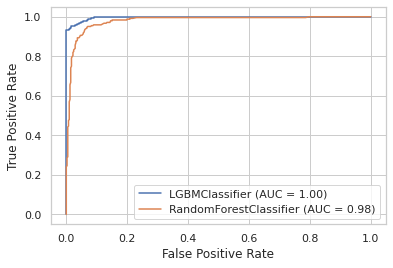

In [38]:
models = [lgb, rclf]
ax = plt.gca()
for i in models:
    plot_roc_curve(i, X_test_scaled, y_test, ax=ax)